## Исследование данных о российском кинопрокате



Целью исследования данных является обработка информации из двух источников: данных министерства культуры РФ и данных кинопоиска. Для выявления трендов на Российском рынке проката кино.

Для выполнения цели необходимо выполнить следующий комплекс задач:
    
    1) Создать дата-фрейм с пригодными для предобработки данными
    
    2) Соединить данные, выполнить предобработку (преобразовать типы данных, заполнить пропуски, проработать дубликаты (явные и неявные), изучить числовые и категориальные данные, выявить аномальные значения);
        
        2.1) Добавить новые столбцы необходимые для дальнейшего анализа данных (столбец с информацией о годе проката, а именно, выделите год из даты премьеры фильма, столбцы с именем и фамилией главного режиссёра и основным жанром фильма, включающие первое значение в данных, столбец с долей государственной поддержки от общего бюджета фильма);
        
    3) Провести анализ получившихся данных, ответить на основные вопросы:
        
        3.1) Сколько фильмов выходило в прокат каждый год?
        3.2) Какая долю составляют фильмы с указанной информацией о прокате в кинотеатрах? 
        3.3) Как эта доля менялась по годам?
        3.4) Как менялась динамика проката по годам.
        3.5) В каком году сумма сборов была минимальной? А максимальной?
        3.6) Какова среднюю и медианная сумму сборов для каждого года? 
        3.7) Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? 
        3.8) Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
        3.9) Меняется ли картина в зависимости от года? 

    4) Исследовать фильмы, которые получили гос. поддержку.
    5) Сформировать общие выводы.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import re

import os
import warnings

warnings.filterwarnings('ignore')
os.chdir(r'C:\Users\Grine\Desktop\GitHub\project_to_upload\2. СБОРНЫЙ ПРОЕКТ 1')

In [61]:
data_movies = pd.read_csv('mkrf_movies.csv') 
data_shows = pd.read_csv('mkrf_shows.csv')  

In [62]:
data_movies.info()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Совпадением является столбец "puNumber" - являющийся номером прокатного удостоврения. Однако есть 2 проблемы:
    
    1) дата-фреймы разных размеров;
    2) у этих столбцов в разных таблицах разные типы данных;
Необходимо изучить данные более подробно.

In [63]:
print('Кол-во уникальных прокатных удостоверений в data_movies', len(data_movies['puNumber'].unique()))
print('Кол-во уникальных прокатных удостоверений в data_shows', len(data_shows['puNumber'].unique()))

Кол-во уникальных прокатных удостоверений в data_movies 7484
Кол-во уникальных прокатных удостоверений в data_shows 3158


*Вероятно, при соединение методом через inner join будут наблюдаться потери данных. Поэтому необходимо прибегнуть к другому методу. Предлагается использовать метод .merge() с параметрами: on='puNumber', how='left', где левой таблицей будет таблица с бОльшим количество записей. Однако, перед тем как начать, необходимо преобразовать типы данных.*

In [64]:
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce')
data_shows['puNumber'] = pd.to_numeric(data_shows['puNumber'], errors='coerce')

df = data_movies.merge(data_shows, on='puNumber', how='left') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [65]:
# создадим переменную, которая будет хранить кол-во уникальных записей (без Nan) в новом дата-фрейме
count_not_null_df = len(df[df['box_office'].notna()]['box_office'].unique())

# если кол-во значений в переменной count_not_null_df = кол-ву значений в исходной таблице, тогда
if count_not_null_df - len(data_shows['box_office'].unique()) == 0:
    print('Данные подтянулись в полном размере')

Данные подтянулись в полном размере


__Дата-фрейм к работе готов. Количество данных не уменьшилось, нужный столбец подтянулся в полном размере.__

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [67]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], infer_datetime_format=True)

In [68]:
df['ratings'] = df['ratings'].str.replace(r"[^\d\.]", "", regex=True) # уберём все лишние символы
df['ratings'] = pd.to_numeric(df['ratings']) # переведём в формат float64

In [69]:
# напишем функицю, которая переведёт рейтинг из % системы в 10 бальную
def rating(row):
    rate = row['ratings']
    if rate > 10:
        return rate/10
    return rate

df['ratings'] = df.apply(rating, axis=1)

In [70]:
#заменим типы данных float 64 на float32 сразу во всех столбцах
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [71]:
df.isna().mean().sort_values(ascending=False)*100 # посмотрим процент пропущенных значений

refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source        95.57
box_office              57.81
genres                  13.04
ratings                 12.92
producer                 7.59
film_studio              0.24
director                 0.12
production_country       0.03
puNumber                 0.01
title                    0.00
show_start_date          0.00
type                     0.00
age_restriction          0.00
dtype: float64

Столбцы refundable_support и nonrefundable_support содержат информацию о объёме возрватных и невозврастных средствах государственной поддержки. Пропуски в таких данных не случайны и могут быть вызваны отсутсвием государственной поддержки. Заменять пропуски в таких данных - не корректно;

Столбец financing_sourse  - означает источник гос. финансирования. Если финансирования нет, то и источника нет;

Столбцы budget и box_office - содержат информацию о бюджете и сборах фильма. Заменить такие данные невозможно, потому что бюджет и кассовые сборы фильма - могут быть пропущены не случайно. 

ratings - средний рейтинг фильма. Значние, которое невозможно прогнозировать. Всё зависит от конкретного фильма, также и с столбцами: film_studio, director, production_country, puNumber, genre.

В данной выборке нет пропущенных значений, которые пропущены абсолютно случайным образом. Каждая строка, каждый фильм - это набор уникальных характеристик, параметров, данных, заполненение пропусков в которых может привести к ряду статистический и фактических ошибок. Видимо, иногда, работая с данными стоит пренебрегать правилом избавления от пропусков.

Все пропуски соотвествуют типу: MNAR (Missing Not At Random / Отсутствует не случайно) или MAR (Missing At Random / Отсутствует случайно). Пропусков с типом: MCAR (Missing Completely At Random / Отсутствует совершенно случайно) - нет.


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [72]:
df.duplicated().sum() # явных дубликатов по всем строкам в выборке нет

0

__Необходимо изучить также и информацию о неявных дубликатов, вероятно, что неявные дубликаты могут возникнуть в таких столбцах, как:__

type, production_country, genres, age_restriction


In [73]:
print(df['type'].unique())
df['type'] = df['type'].replace(' Художественный', 'Художественный')
df['type'] = df['type'].replace(' Анимационный', 'Анимационный')

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


In [74]:
print('Кол-во дубликатов до:', len(df['production_country'].unique()))
df['production_country'] = df['production_country'].str.strip() 
print('Кол-во дубликатов после:', len(df['production_country'].unique()))

Кол-во дубликатов до: 951
Кол-во дубликатов после: 935


In [75]:
df['title'] = df['title'].drop_duplicates()
df['puNumber'] = df['puNumber'].drop_duplicates()

Данные очищены от неявных дубликатов. Вероятно, что дубликаты возникли из-за того, что данные получены из разных источников, а, следовательно, и формат заполнения данных может отличаться. 

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

    1) Общие проблемы, которые присутсвуют в большинстве категориальных значений это наличие пробелов в тексе. На этапе предобработке мы очистили самые важные для анализа столбцы от них. Также важной проблемой в категориальных данных является разный порядок одинаково текста. Где-то может быть написана одна последовательнось слов, а где-то другая. Однако, на 
    анализе это не должно отразиться.

    2) Данные в поле type были исправлены на предыдущем этапе.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6772 non-null   object             
 1   puNumber               2891 non-null   float32            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float32            
 10  nonrefundable_support  332 non-null    float32            
 11  budget                 332 non-null    float32          

In [77]:
name_of_cetegorial_data = df.select_dtypes('object').columns.tolist()

# по каждой колонке проведём анализ и избавимся от лишнего
for c_n in name_of_cetegorial_data:
    tech_list = [] 
    for mean in df[c_n].tolist(): 
        new_mean_1 = re.findall(r'[а-яА-ЯёЁa-zA-Z,0-9 "," "«" "»" "№" "+"]', str(mean)) # создадим новое значение 
        new_mean = ''.join(new_mean_1) 
        tech_list.append(new_mean) 
        
    df[c_n] = tech_list 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [78]:
df[df['budget'] < df['nonrefundable_support']]
df.loc[df['budget'] == 0, 'budget'] = df['nonrefundable_support'] + df['refundable_support']

In [79]:
df.describe() 

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"2,891.00",332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"155,111,904.00","11,864,457.00","48,980,984.00","131,422,408.00",6.49,"76,478,696.00"
std,"49,838,008.00","24,916,556.00","59,980,136.00","187,148,256.00",1.11,"240,353,232.00"
min,"1,811,096.00",0.00,0.00,"6,000,000.00",1.00,0.00
25%,"114,002,368.00",0.00,"25,000,000.00","45,524,800.00",5.90,"86,239.00"
50%,"121,032,112.00",0.00,"30,000,000.00","71,196,904.00",6.60,"2,327,987.50"
75%,"221,030,064.00","15,000,000.00","40,375,000.00","150,000,000.00",7.20,"23,979,672.00"
max,"231,001,104.00","180,000,000.00","400,000,000.00","2,305,074,176.00",9.90,"3,073,568,768.00"


В столбцах "refundable_support", "nonrefundable_support" и "box_office", наблюдается высокое средне-квадратичное отколнение. Вероятно, стоит очистить данные от выбросов. На начальном этапж такой идеии не поступало, потому что было 2 проблемы:

    1) относительно малое кол-во заполненных данных (большое кол-во не прогнозируемых пропусков)
    2) то, что данные хаотичны. Действительно, ведь, один фильм может получить финансирование в размере 4 млн рублей. А другой в размере 400 млн. руб. Однако, сейчас было принято решение привести данные к более однородному формату, чтобы повысить точность аналитики.

In [80]:
# почистим столбцы поочереди.
q3_refunable = df['refundable_support'].quantile(0.75)*1.5
df = df.query('refundable_support < @q3_refunable or refundable_support.isna()')


q3_nonrefunable = df['nonrefundable_support'].quantile(0.75)*1.5
df = df.query('nonrefundable_support < @q3_nonrefunable or nonrefundable_support.isna()')

q3_budget = df['budget'].quantile(0.75)*1.5
df = df.query('budget < @q3_budget or budget.isna()')

q3_box_office = df['box_office'].quantile(0.75)*1.5
df = df.query('box_office < @q3_box_office or box_office.isna()')

display(df.describe())
print('теперь в данных нет выбросов!')

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"2,773.00",167.00,167.00,167.00,"5,769.00","2,387.00"
mean,"156,665,616.00","922,155.69","27,666,816.00","53,196,536.00",6.51,"3,628,019.25"
std,"50,293,228.00","3,109,821.00","8,156,640.50","21,239,974.00",1.12,"6,043,547.00"
min,"1,811,096.00",0.00,"3,000,000.00","6,000,000.00",1.00,0.00
25%,"114,002,312.00",0.00,"25,000,000.00","38,471,784.00",5.90,"16,144.50"
50%,"121,033,616.00",0.00,"27,000,000.00","46,923,776.00",6.60,"822,023.00"
75%,"221,033,008.00",0.00,"30,000,000.00","62,207,872.00",7.30,"4,234,810.00"
max,"231,001,104.00","20,000,000.00","59,000,000.00","115,000,000.00",9.90,"28,656,198.00"


теперь в данных нет выбросов!


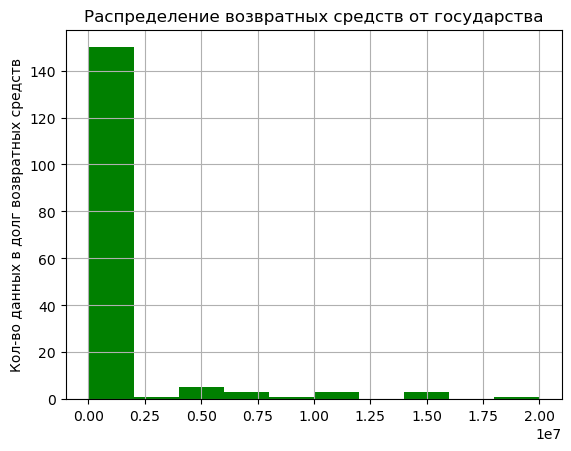

In [81]:
df['refundable_support'].hist(bins=10, color = 'green')
# после очистки осталось совсем мало данных 
plt.title("Распределение возвратных средств от государства")
plt.ylabel("Кол-во данных в долг возвратных средств");

График не информативен, поскольку после очистки от выбросов данных осталось совсем мало. Однако, это может быть вызвано тем, что государственная поддержка с "возвратной моделью" даётся крайне редко. Будем считать, что эти данные корректны.

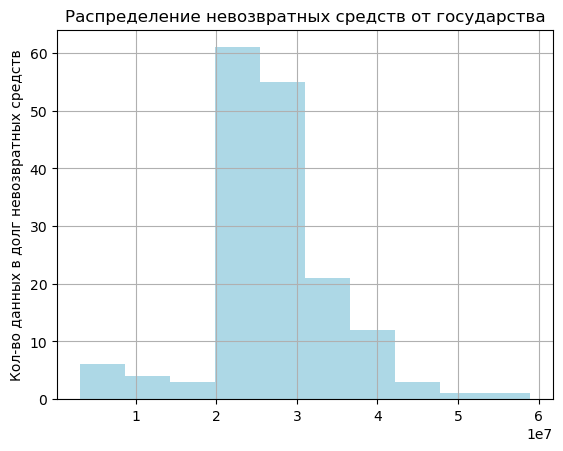

In [82]:
df['nonrefundable_support'].hist(bins=10, color = 'lightblue')
# после очистки осталось совсем мало данных 
plt.title("Распределение невозвратных средств от государства")
plt.ylabel("Кол-во данных в долг невозвратных средств");

Наблюдается нормальное распределние.

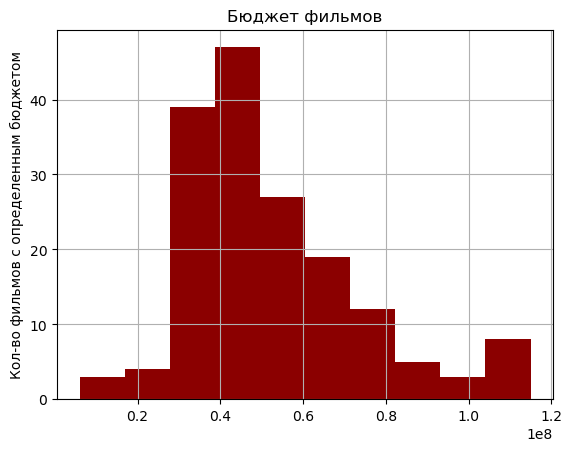

In [83]:
df['budget'].hist(bins=10, color = 'darkred')
# после очистки осталось совсем мало данных 
plt.title("Бюджет фильмов")
plt.ylabel("Кол-во фильмов с определенным бюджетом");

Наблюдается нормальное распределние.

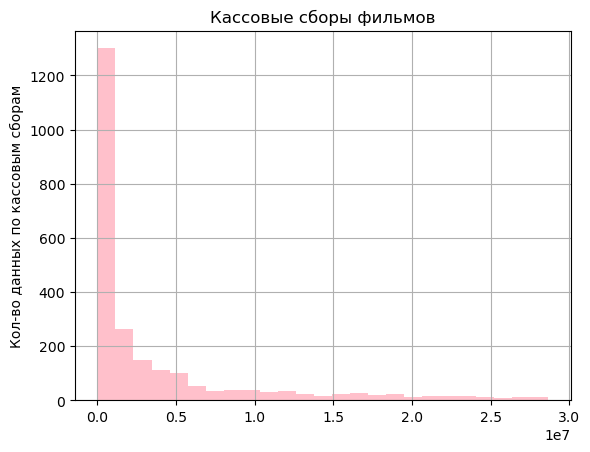

In [84]:
df['box_office'].hist(bins=25, color = 'pink')
# после очистки осталось совсем мало данных 
plt.title("Кассовые сборы фильмов")
plt.ylabel("Кол-во данных по кассовым сборам");

Теперь количественные данные тоже подготовлены к работе! Данные о бюджете, похожи на распределение Пуассона. Такие данные пригодны для работы. 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [85]:
df['year'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [89]:
df['director'].str.split(',')

0           [Кевин Костнер]
1                [ЕМатвеев]
2       [Тимур Бекмамбетов]
3       [Тимур Бекмамбетов]
4       [Тимур Бекмамбетов]
               ...         
7481          [Фил Грабски]
7482           [Ник Пауэлл]
7483      [Чарльз ЕБастьен]
7484              [АБеляев]
7485              [ИТрусов]
Name: director, Length: 6713, dtype: object

In [90]:
def foo(x):
    return x.split(',')[0]

In [92]:
df['major_director'] = df['director'].apply(foo)
df['major_genre'] = df['genres'].apply(foo)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [96]:
df['goverment_fin'] = (df['refundable_support'] + df['nonrefundable_support'])/df['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

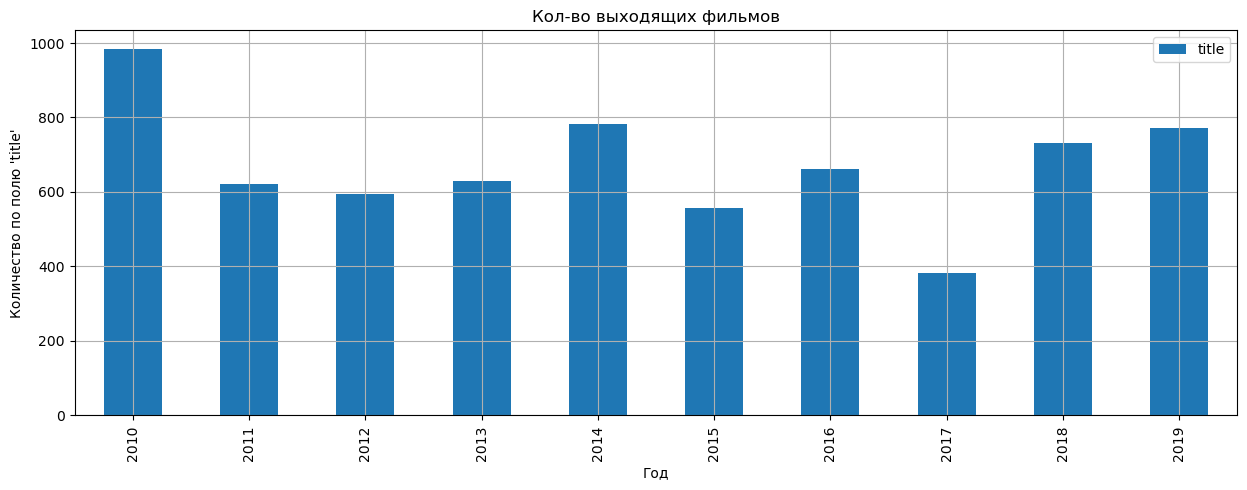

In [97]:
# построим график, который покажет сколько фильмов выходило по годам
df.pivot_table(index='year', values='title', aggfunc='count').reset_index().plot(x='year',
                                                                                 y='title',
                                                                                 kind='bar',
                                                                                 grid=True,
                                                                                 figsize=(15, 5))
plt.title("Кол-во выходящих фильмов")
plt.xlabel("Год")
plt.ylabel("Количество по полю 'title'");

*Больше вссего фильмов вышло в 2010 году, а меньше, в 2017*

Доля фильмов с указанной информацией о прокате в кинотеатрах =  35.6 %


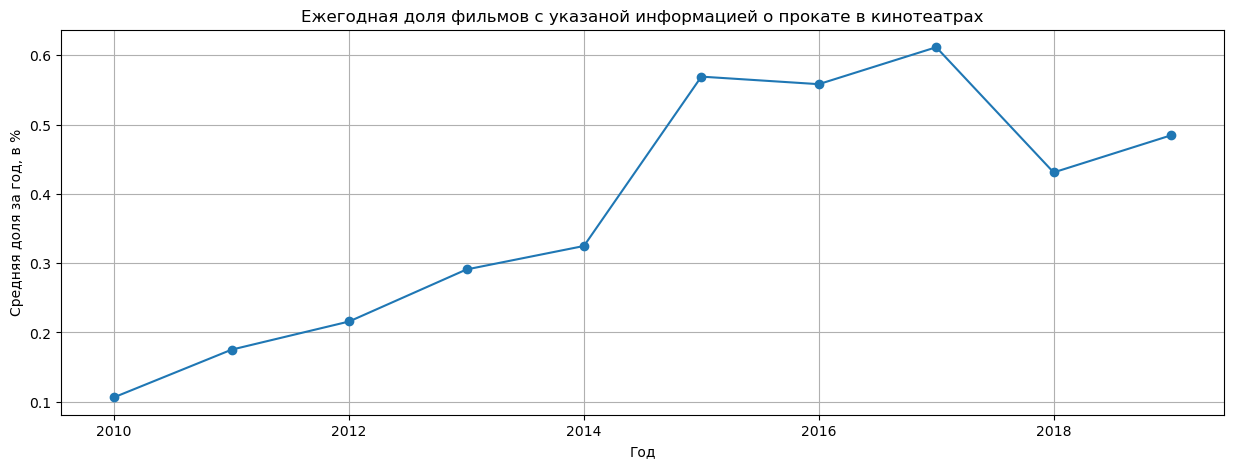

In [98]:
print('Доля фильмов с указанной информацией о прокате в кинотеатрах = ', (100*df['box_office'].notna().mean()).round(1), '%')

(df.groupby("year")["box_office"].agg(lambda x: x.notna().mean())
   .plot(x='year',
         y='average_loss',
         style = 'o-',
         grid=True,
         figsize=(15, 5))
)  

plt.title("Ежегодная доля фильмов с указаной информацией о прокате в кинотеатрах")
plt.xlabel("Год")
plt.ylabel("Средняя доля за год, в %");

Данные, которые нам доступны, в среднем содержат только 42,2% заполненных значений по полю box_office. Меньше всего данных содержится в 2010 году. А больше всего данных в 2017 году. Будем учитывать это при дальнейшей аналитике.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [99]:
# посчитаем суммарные доходы по каждому году
pivot_to_dynamic_box = df.pivot_table(index='year', values='box_office', aggfunc='sum').reset_index()

# посчитаем минимальную и максимальную сумму доходв 
min_mean_box_office = pivot_to_dynamic_box[pivot_to_dynamic_box['box_office'] == pivot_to_dynamic_box['box_office'].min()]
max_mean_box_office = pivot_to_dynamic_box[pivot_to_dynamic_box['box_office'] == pivot_to_dynamic_box['box_office'].max()]

# выведим информацию о годах, с максимальной и минимальной суммой доходов
print("Данные о годе, когда сумма сборов была минимальной: \n", min_mean_box_office)
print("\n Год, когда сумма сборов была минимальной -", min_mean_box_office['year'][0])
print('\n')
print("Данные о годе, когда сумма сборов была Максимальной: \n", max_mean_box_office)
print("\n Год, когда сумма сборов была максимальной -", max_mean_box_office['year'][8])

Данные о годе, когда сумма сборов была минимальной: 
    year   box_office
0  2010 2,428,654.00

 Год, когда сумма сборов была минимальной - 2010


Данные о годе, когда сумма сборов была Максимальной: 
    year       box_office
8  2018 2,007,544,704.00

 Год, когда сумма сборов была максимальной - 2018


*Минимальная сумма сборов была в 2010 году, а максимальная в 2018. Это может быть связано с тем, что набор заполенной информации неполон в 2010 году и поэтому, цифры значительно ниже. Ведь в 2010 году вышла большая часть фильмов. Вероятно, что необходимо запросить дополнительные сведения о кассовых сборах фильмов, от отдела разработки. Чтобы провести более качественный анализ.*


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [100]:
# создадим сводную таблицу с нужными параметрами
pivot_df = df.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean']).reset_index()
pivot_df.columns = ['year', 'median_box_office', 'mean_box_office']
pd.options.display.float_format = '{:,.2f}'.format
display(pivot_df)

,year,median_box_office,mean_box_office
0,2010,"1,700.00","23,130.04"
1,2011,"3,000.00","129,383.16"
2,2012,"5,660.00","54,339.24"
3,2013,"3,500.00","53,785.11"
4,2014,"14,255.00","1,026,429.00"
5,2015,"1,608,257.00","4,855,756.00"
6,2016,"1,301,350.50","4,192,761.00"
7,2017,"3,418,891.00","6,547,430.00"
8,2018,"3,803,518.75","6,373,158.00"
9,2019,"2,262,082.62","4,669,892.00"


*Если мы посмотрим на данные в другом разрезе, а именно посчитаем медиану и среднее, то мы увидим, что данные раскрываются иначе. По медиане, 2010 год по-прежнему остался самым низкодоходным, а вот самый прибыльный год оказался - 2017й. Если же смотреть по среднему арифметическому, то самым выгодным стал 2019 год, а самым невыгодным - 2018ый. Такой разброс связан с тем, что данные заполнены не равномерно.*

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [101]:
# выделим нужную информацию из исходных данных
data_for_ages = df[['age_restriction', 'year', 'box_office']].query('box_office > 1 and year >= 2015 and  year <= 2019')

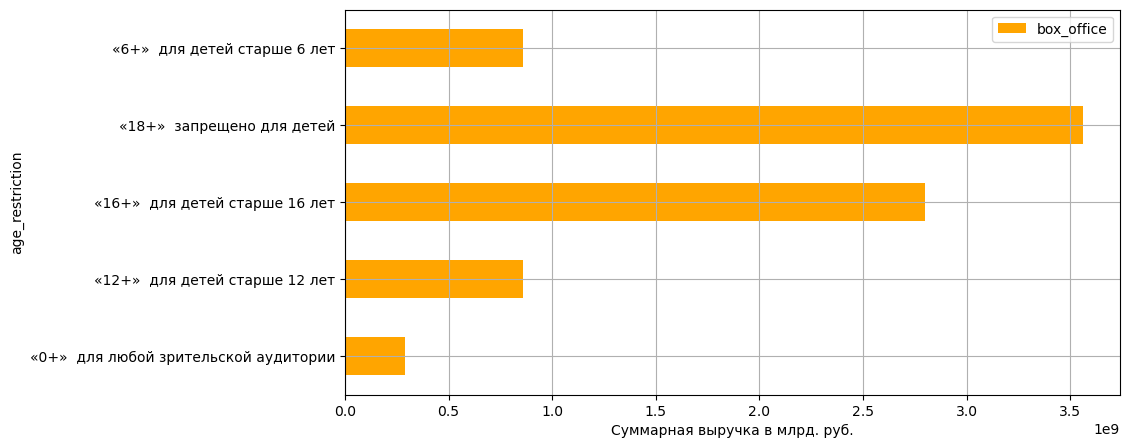

In [102]:
# с помощью сводных таблиц, построим график, который наглядно отразит зависимость возрастных ограничений и сборов фильма
(data_for_ages
 .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
 .reset_index()
 .plot(x='age_restriction', y='box_office', kind='barh', figsize=(10, 5), color='orange', grid=True)
);
plt.xlabel("Суммарная выручка в млрд. руб.");

*Безусловно, возрастные ограничения влияют на сборы фильмов, потому что связаны с разной целевой аудиторией. Вероятнее всего, в кинотеатры редко будут ходить люди, с детьми от 0 до 6 лет, поэтому и кассовые сборы таких фильмов - меньше. Что касается таких категорий, как 6+ и 12+, тут вероятность появления родителей с детьми намного выше. Говоря о категории 16+, можно предположить, что эта категория является целевой аудиторией многих кинотеатров. Ведь подростки часто ходят в кинотеатры, в связи с большим количеством свободонго времени. Так что да, зависимость определённо есть!*

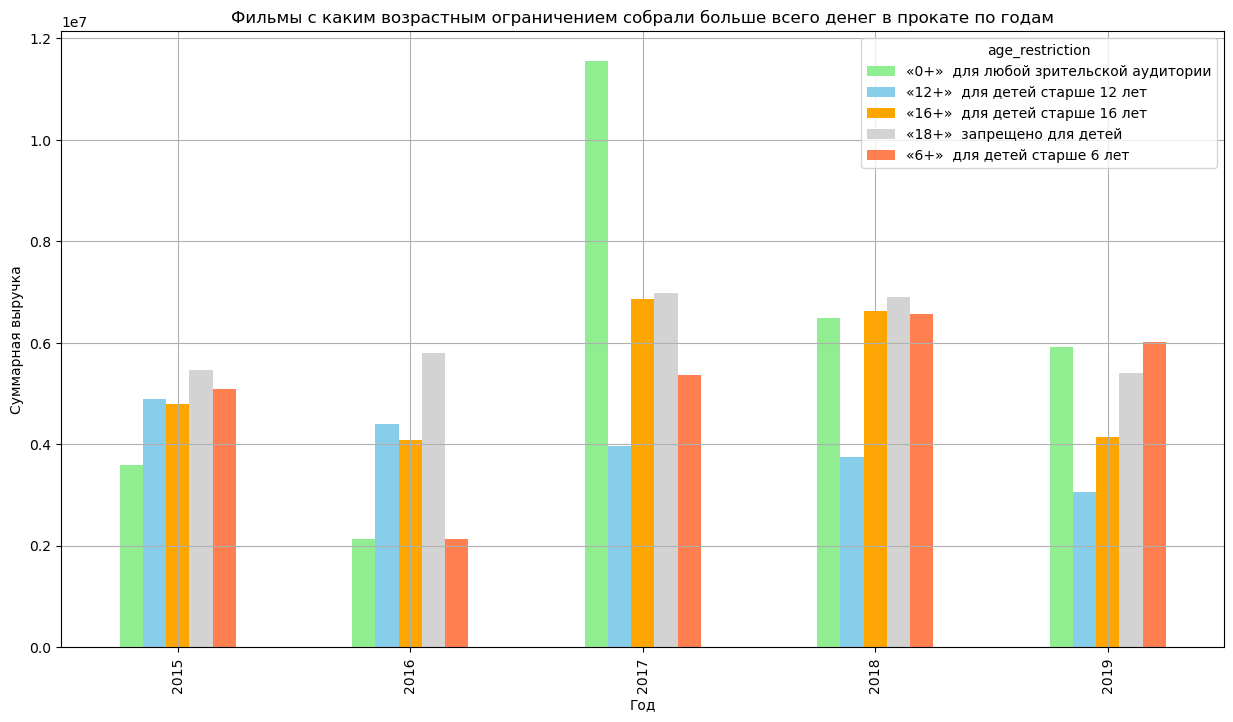

In [103]:
# Создадим также дигарамму, которая покажет с какими возрастными ограничениями фильмы собрали больше всего денег в прокате по годам
(data_for_ages
 .pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='mean')
 .reset_index()
 .plot(x='year', kind='bar',
       legend=True,
       figsize=(15, 8),
       grid=True,
       color=['lightgreen', 'skyblue', 'orange', 'lightgrey', 'coral']))

plt.title("Фильмы с каким возрастным ограничением собрали больше всего денег в прокате по годам")
plt.xlabel("Год")
plt.ylabel("Суммарная выручка");

*В разрезе выбранных лет, картина уже не так однозначна, как тогда, когда анализировались общие доходы от кино по возрастным категориям. Видно, что от года в год, ситуацию меняется и нельзя однозначно сказать с чем это связано. Можно предположить, что в разные года, разные поколения попадают в выборку. ПОэтому в 2016 и 2017 году, подростки от 16 лет чаще попадали в выборку, чем в 2019 году. Также это может быть связано с демографическими особенностями региона, по которому собирали данные. Может быть связано и с особенностями экономики региона.*

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

Для заврешения аналитического исследования проведём следующий ряд действий:

    1) Создадим дата-фрейм (data), который будет включать в себя все необходимые поля для аналитики, а именно:
            
            a) type - тип кино
            b) director - директор кино
            c) major_producer - главный продюссер
            d) major_genre - главный жанр
            e) goverment_fin - % государственных денег в общем бюджете фильма
            f) budget - бюджет фильма
            j) ratings - рейтинг фильма
    
    2) Вяывим следующие парметры:
            a) В каком жанре самое высокая гос. поддержка?
            b) Топ-3 директоров и топ-3 продюссеров, которые чаще всего получали гос. поддержку
            c) Фильмы, получившие гос.поддержку какой средний рейтинг имеют? 
            d) Увеличивается ли кол-во фильмов с гос. поддержкой по годам?
            
В ходе проведения данной аналитики, будем учитывать, что выборка может быть неравномерна. Поэтому будем считать в %, чтобы оперировать относительными, а не абсолютными значениями. Также будем работать только с теми данными, которые попали в выборку, т.е. теми, кто получил гос. поддержку.

In [104]:
# подготовим данные
df_gov = df.query('goverment_fin > 0 and goverment_fin != inf').reset_index(drop=True) # отберём те данные, когда у фильмов есть гос. финансирование

# создадим таблицу с которой будет осуществляться работа
data = df_gov[['year', 'type', 'director', 'major_director', 'major_genre', 'goverment_fin', 'budget', 'ratings']].copy() 

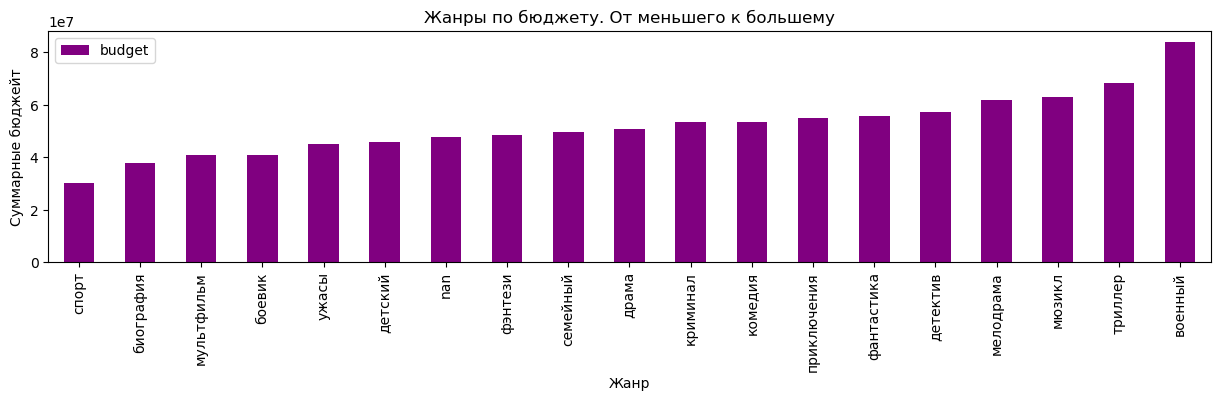

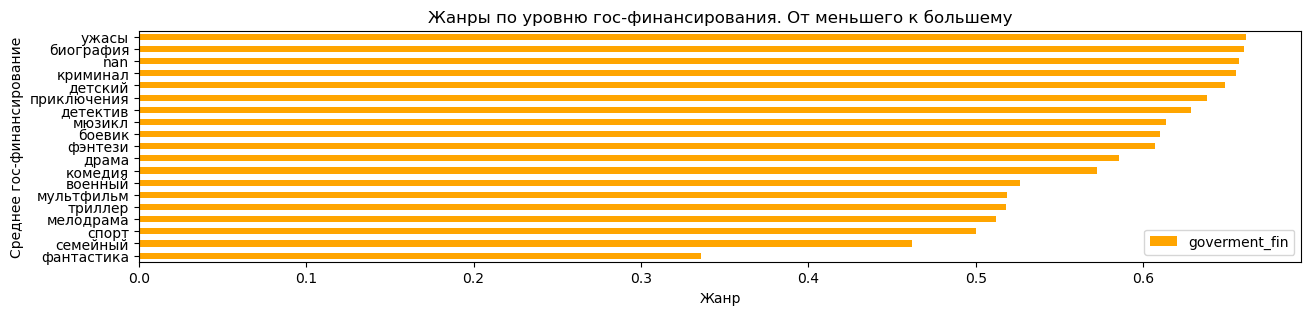

In [112]:
# посмотрим зависимость бюджета и государственного финансирования от жанра.
genre_budget = (data
 .pivot_table(index='major_genre', values='budget', aggfunc='mean')
 .reset_index()
 .sort_values(by='budget'))

genre_budget.plot(x='major_genre',
       y='budget',
       kind='bar',
       figsize=(15, 3),
       color='purple');

plt.title("Жанры по бюджету. От меньшего к большему")
plt.xlabel("Жанр")
plt.ylabel("Суммарные бюджейт");

genre_gov = (data
 .pivot_table(index='major_genre', values='goverment_fin', aggfunc='mean')
 .reset_index())
             
(genre_gov
 .sort_values(by='goverment_fin')
 .plot(x='major_genre',
       y='goverment_fin',
       kind='barh',
       figsize=(15,3),
       color='orange'));

plt.title("Жанры по уровню гос-финансирования. От меньшего к большему")
plt.xlabel("Жанр")
plt.ylabel("Среднее гос-финансирование");

*1) Самыми высоко-бюджетными жанрами считаются, такие жанры, как: военный, триллер, мюзикл*

*2) Фильмы, которые чаще всего получают гос. финансирование, с самым высоким относительным вкладом гос-два, являются жанры ужасы, биография и криминал*

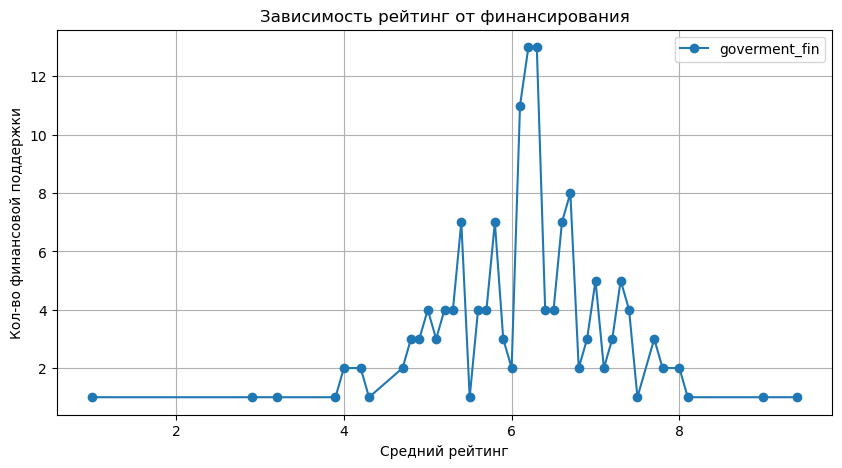

In [117]:
data.pivot_table(index='ratings', values='goverment_fin', aggfunc='count').plot(figsize=(10,5), 
                                                                               grid=True,
                                                                               style='o-',
                                                                               legend=True)
plt.title("Зависимость рейтинг от финансирования")
plt.xlabel("Средний рейтинг")
plt.ylabel("Кол-во финансовой поддержки");

Средний рейтинг фильмов с гос-поддержкой чаще всего находится в интервали от 5 до 7.

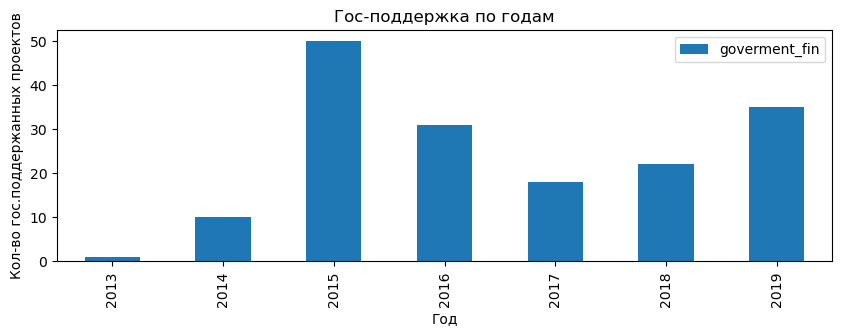

In [119]:
(data
 .pivot_table(index='year', values='goverment_fin', aggfunc='count')
 .reset_index()
 .sort_values(by='year')
 .plot(x='year', kind='bar', figsize=(10,3)));

plt.title("Гос-поддержка по годам")
plt.xlabel("Год")
plt.ylabel("Кол-во гос.поддержанных проектов");

Больше всего фильмов с гос-поддержкой было в 2015 году, а меншье всего в 2013 году.

### Шаг 5. Напишите общий вывод

В ходе выполнения работы было продело 4 основных шага. 
    
    1) Открытие файлов и краткое изучение данных, объединение данных в один дата-фрейм пригодный к работе. На этом этапе, было выявлено, что данные неполные. В них много пропусков, и неправильные форматы. 
    
    2) Предобработка данных. 
            a) Проверка типа данных, на этом этапе столбец show_start_date был переведён в формат даты, рейтинг был переведён в 10-ую систему , также все столбцы с типом float64, были переведены в float32
            b) Далее были изучениы пропуски в дата-фрейме. Этот этап стал проблемным. Поскольку в результате его выполнения, было выявлено, что пропуски присутсвуют, однако, как-то их заменить не предоставляется возможным. Поскольку все пропущенные данные пропущены не случайно или не имеют логического обоснования для подстановки каких-то заменяющих значений. 
            c) Изучение дубликатов, показало, что в исходных данных встречаются явные дубликаты. От них была проведена очистка данных. Также было видно, что встречаются неявные дубликаты, в основном, из-за наличия лишних пробелов.
            d) Далее были изучение категориальные значения. В рамках изучения этих данных, было выявлено, что в данных встречается проблема, с наличием пробелов, а также, в некоторых случаях, нарушен порядок написания текста.
            e) В количественных значениях, также были найдены и исправлены ошибки. Оказалось, что есть фильмы, у которых возвратные и/или невозвратный бюджет больше нуля, а вот общий бюджет равен нулю. Такие случаи были исправлены.
            f) Были также добавлены все новые столбцы, необходимые для аналитики, а именно: год (year),  гланвый продюссер (major_producer), гланвый жанр (major_genre) и доля финансирования засчёт гос. средств (goverment_fin)
    
    3) Далее был выполнен исследовательских анализ данных, в результет которого были сделаны следующие выводы:
            a) Больше всего данных содержится о фильмах 2010 года;
            b) Доля фильмов с указанной информацией о прокате в кинотеатрах =  42.2 %;
            c) Меньше всего данных содержится в 2010 году. А больше всего данных в 2017 году.
            d) Год, когда сумма сборов была минимальной - 2010, а год, когда сумма сборов была максимальной - 2018
            e) По медианному кол-ву сборов, 2010 год самый низкодоходный, самый прибыльный - 2017й. Средние доходы самые высокие в 2019 году, а самые низкие в 2018 году.
            f) Возростные ограчнения влияют на сборы фильмов. Как в общей выборке, так и по годам. Наиболее высоко-прибыльными являются фильмы с возрастным огранчением 16+
            
     4) Заверщающий этап был посвящён анализу фильмов с гос. поддержкой, в результате были сделаны следующие выводы:
            a) Самыми высоко-бюджетными жанрами считаются, такие жанры, как: История, приключения, детектив, спорт.
            b) Фильмы, которые чаще всего получают гос. финансирование, с самым высоким относительным вкладом гос-два, являются жанры реальное тв и криминал, детское кино и ужасы.
            c) Чаще всего гос. поддержку получали, такие директоры, как: Р.Давлетьяров, Д.Дьяченко, С.Андреасян
            d) Чаще всего гос. поддержку получали, такие продюссеры, как: С.Сельянов, Э.Илоян, Р.Дишдишян, Т.Бекмамбетов
            e) Средний рейтинг фильмов с гос-поддержкой чаще всего находится в интервали от 5 до 7.
            f) Больше всего фильмов с гос-поддержкой было в 2015 году, а меншье всего в 2013 году.
            j) Чаще всего фильмы получают гос. поддержку, если они художественные